# Perceived Dependence of Stocks and Correlation: Cumulative Alpha of High-Low Strategies

For my thesis, i will look into the difference between the perceived dependence and the actual correlation of the return of stocks with the market return. In this notebook, we will compare the results of the High-Low Comove strategy with those of the High-Low Beta strategy.

## 1. Imports

We need the following libs:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

Firstly, read in the Excels of the High-Low Comove strategy (Monthly Data.xlsx and Monthly Results.xlsx, after copying and renaming them). Secondly, do the same for the Excels of the High-Low Beta strategy. 

In [2]:
Data_ExcelFile ='Monthly Data Comove.xlsx'
dataComove =  pd.read_excel(Data_ExcelFile)
# Remove the first numbered Index column. We'll use .iloc here for slicing.
dataComove = dataComove.iloc[:, 1:]
# Set the MMYYYY column as index
dataComove.set_index('MMYYYY', inplace=True)

Data_ExcelFile ='Monthly Data Beta.xlsx'
dataBeta =  pd.read_excel(Data_ExcelFile)
# Remove the first numbered Index column. We'll use .iloc here for slicing.
dataBeta = dataBeta.iloc[:, 1:]
# Set the MMYYYY column as index
dataBeta.set_index('MMYYYY', inplace=True)

Results_ExcelFile = 'Monthly Results Comove.xlsx'
# Read the specific sheet into a DataFrame
resultsComove = pd.read_excel(Results_ExcelFile, sheet_name='HighLow_4F')

Results_ExcelFile = 'Monthly Results Beta.xlsx'
# Read the specific sheet into a DataFrame
resultsBeta = pd.read_excel(Results_ExcelFile, sheet_name='HighLow_4F')

In [3]:
dataComove

,Avg. Comove,Comove rank,HighestComove_Dummy,Avg. Beta,Avg. Return,Monthly Market Return,Year,Month,Mkt-RF,RF,...,HML,HML_Devil,RMW,CMA,UMD,UMD_Trend,BAB,QMJ,Carry,Seasonal
MMYYYY,,,,,,,,,,,,,,,,,,,,,
12002,40.776435,1,0,0.754675,0.010390,-0.020303,2002,1,-0.0470,0.0014,...,0.0183,0.002349,0.0313,0.0258,0.057496,0.023426,0.000910,0.024064,0.01884,0.002665
12002,47.036102,2,1,0.852650,-0.011330,-0.020303,2002,1,-0.0470,0.0014,...,0.0183,0.002349,0.0313,0.0258,0.057496,0.023426,0.000910,0.024064,0.01884,0.002665
12002,50.648072,3,1,0.813622,0.006576,-0.020303,2002,1,-0.0470,0.0014,...,0.0183,0.002349,0.0313,0.0258,0.057496,0.023426,0.000910,0.024064,0.01884,0.002665
12002,53.959039,4,1,0.819501,-0.005736,-0.020303,2002,1,-0.0470,0.0014,...,0.0183,0.002349,0.0313,0.0258,0.057496,0.023426,0.000910,0.024064,0.01884,0.002665
12002,61.450240,5,1,0.857848,-0.015175,-0.020303,2002,1,-0.0470,0.0014,...,0.0183,0.002349,0.0313,0.0258,0.057496,0.023426,0.000910,0.024064,0.01884,0.002665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22024,43.063263,1,0,1.121668,-0.006109,0.019989,2024,2,0.0127,0.0042,...,-0.0076,-0.035207,0.0109,-0.0195,0.040707,NaN,-0.008973,0.034313,NaN,NaN
22024,50.356394,2,1,1.170942,-0.005237,0.019989,2024,2,0.0127,0.0042,...,-0.0076,-0.035207,0.0109,-0.0195,0.040707,NaN,-0.008973,0.034313,NaN,NaN
22024,54.491951,3,1,1.196805,0.007763,0.019989,2024,2,0.0127,0.0042,...,-0.0076,-0.035207,0.0109,-0.0195,0.040707,NaN,-0.008973,0.034313,NaN,NaN


In [4]:
dataBeta

,Avg. Comove,Beta rank,HighestBeta_Dummy,Avg. Beta,Avg. Return,Monthly Market Return,Year,Month,Mkt-RF,RF,...,HML,HML_Devil,RMW,CMA,UMD,UMD_Trend,BAB,QMJ,Carry,Seasonal
MMYYYY,,,,,,,,,,,,,,,,,,,,,
12002,50.061862,1,0,0.259951,0.016683,-0.020303,2002,1,-0.0470,0.0014,...,0.0183,0.002349,0.0313,0.0258,0.057496,0.023426,0.000910,0.024064,0.01884,0.002665
12002,50.431724,2,1,0.499907,0.014882,-0.020303,2002,1,-0.0470,0.0014,...,0.0183,0.002349,0.0313,0.0258,0.057496,0.023426,0.000910,0.024064,0.01884,0.002665
12002,49.874214,3,1,0.740269,0.004944,-0.020303,2002,1,-0.0470,0.0014,...,0.0183,0.002349,0.0313,0.0258,0.057496,0.023426,0.000910,0.024064,0.01884,0.002665
12002,50.175887,4,1,1.020126,-0.018749,-0.020303,2002,1,-0.0470,0.0014,...,0.0183,0.002349,0.0313,0.0258,0.057496,0.023426,0.000910,0.024064,0.01884,0.002665
12002,49.860810,5,1,1.559220,-0.029754,-0.020303,2002,1,-0.0470,0.0014,...,0.0183,0.002349,0.0313,0.0258,0.057496,0.023426,0.000910,0.024064,0.01884,0.002665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22024,53.201361,1,0,0.537779,-0.013592,0.019989,2024,2,0.0127,0.0042,...,-0.0076,-0.035207,0.0109,-0.0195,0.040707,NaN,-0.008973,0.034313,NaN,NaN
22024,53.892500,2,1,0.906917,0.010108,0.019989,2024,2,0.0127,0.0042,...,-0.0076,-0.035207,0.0109,-0.0195,0.040707,NaN,-0.008973,0.034313,NaN,NaN
22024,53.591248,3,1,1.143067,0.011685,0.019989,2024,2,0.0127,0.0042,...,-0.0076,-0.035207,0.0109,-0.0195,0.040707,NaN,-0.008973,0.034313,NaN,NaN


In [5]:
resultsComove

,Unnamed: 0,index,Coefficient,P>|z|,Significance
0,0,const,0.004510,0.090364,*
1,1,Mkt-RF,-0.025507,0.634459,NaN
2,2,SMB,-0.274063,0.018747,**
3,3,HML,-0.127725,0.227635,NaN
4,4,UMD,0.137382,0.270116,NaN


In [6]:
resultsBeta

,Unnamed: 0,index,Coefficient,P>|z|,Significance
0,0,const,-0.000462,8.378831e-01,NaN
1,1,Mkt-RF,0.528386,2.377094e-28,***
2,2,SMB,-0.018751,8.916079e-01,NaN
3,3,HML,0.250048,5.887095e-03,***
4,4,UMD,-0.501712,2.028937e-16,***


## 2. Calculating High-Low Portfolios

For both Comove as Beta, we now calculate the differences in return and get the needed four-factor data. 

In [7]:
# Filter rows where Comove rank is 1 or 5
dataHighLowComove = dataComove[dataComove['Comove rank'].isin([1, 5])]

# Groepeer data op 'MMYYYYY' en bereken het verschil in 'Avg. yearly return' tussen de comove ranks
dataHighLowComove.reset_index()
dataHighLowComove_diff = dataHighLowComove.groupby('MMYYYY').apply(lambda x: x[x['Comove rank'] == 5]['Avg. Return'].values[0] - x[x['Comove rank'] == 1]['Avg. Return'].values[0]).reset_index()
# Hernoem de kolommen naar 'MMYYYYY' en 'Portfolio Excess Return'
dataHighLowComove_diff.columns = ['MMYYYY', 'Comove Portfolio Excess Return']
dataHighLowComove_diff.set_index('MMYYYY')

# Filter data om alleen rijen met Comove rank = 1 te behouden
data_rank_1 = dataComove[dataComove['Comove rank'] == 1]
# Selecteer alleen de benodigde kolommen
data_rank_1 = data_rank_1[['Mkt-RF', 'SMB', 'HML', 'UMD']] 

# Voeg de dataframes samen op basis van 'MMYYYY'
dataHighLowComove_diff = pd.merge(dataHighLowComove_diff, data_rank_1, on='MMYYYY', how='left')
dataHighLowComove_diff.set_index("MMYYYY")

,Comove Portfolio Excess Return,Mkt-RF,SMB,HML,UMD
MMYYYY,,,,,
12002,-0.025565,-0.0470,0.0323,0.0183,0.057496
12003,0.007638,-0.0345,0.0242,0.0252,0.008020
12004,0.015318,0.0247,0.0402,0.0239,0.036776
12005,-0.007995,-0.0125,0.0372,0.0157,0.005672
12006,0.034536,0.0638,0.0234,0.0174,0.038699
...,...,...,...,...,...
122019,0.005368,0.0407,0.0271,0.0041,0.013235
122020,-0.014644,0.0567,0.0448,-0.0177,0.021759
122021,-0.001965,0.0516,-0.0104,0.0186,0.004001


In [8]:
# Filter rows where Beta rank is 1 or 5
dataHighLowBeta = dataBeta[dataBeta['Beta rank'].isin([1, 5])]

# Groepeer data op 'MMYYYYY' en bereken het verschil in 'Avg. yearly return' tussen de beta ranks
dataHighLowBeta.reset_index()
dataHighLowBeta_diff = dataHighLowBeta.groupby('MMYYYY').apply(lambda x: x[x['Beta rank'] == 5]['Avg. Return'].values[0] - x[x['Beta rank'] == 1]['Avg. Return'].values[0]).reset_index()
# Hernoem de kolommen naar 'MMYYYYY' en 'Portfolio Excess Return'
dataHighLowBeta_diff.columns = ['MMYYYY', 'Beta Portfolio Excess Return']
dataHighLowBeta_diff.set_index('MMYYYY')

# Filter data om alleen rijen met Beta rank = 1 te behouden
data_rank_1 = dataBeta[dataBeta['Beta rank'] == 1]
# Selecteer alleen de benodigde kolommen
data_rank_1 = data_rank_1[['Mkt-RF', 'SMB', 'HML', 'UMD']] 

# Voeg de dataframes samen op basis van 'MMYYYY'
dataHighLowBeta_diff = pd.merge(dataHighLowBeta_diff, data_rank_1, on='MMYYYY', how='left')
dataHighLowBeta_diff.set_index("MMYYYY")

,Beta Portfolio Excess Return,Mkt-RF,SMB,HML,UMD
MMYYYY,,,,,
12002,-0.046437,-0.0470,0.0323,0.0183,0.057496
12003,-0.002506,-0.0345,0.0242,0.0252,0.008020
12004,0.029509,0.0247,0.0402,0.0239,0.036776
12005,-0.002878,-0.0125,0.0372,0.0157,0.005672
12006,0.038127,0.0638,0.0234,0.0174,0.038699
...,...,...,...,...,...
122019,0.016095,0.0407,0.0271,0.0041,0.013235
122020,0.041921,0.0567,0.0448,-0.0177,0.021759
122021,0.037094,0.0516,-0.0104,0.0186,0.004001


## 3. Calculating alpha's based on the estimated coefficients

Now we will take the monthly factor data and multiply it by their coefficients. 

In [9]:
# Extract coefficients from 'resultsComove', skipping the first row (alpha)
coefficients = resultsComove['Coefficient'].iloc[1:].tolist()
# Skip the first column of 'dataHighLowComove_diff' which is portfolio excess return
data_high_low = dataHighLowComove_diff.iloc[:, 2:]
# Multiply each column in 'data_high_low' by the corresponding coefficient
# Ensure there are exactly four columns to match the four coefficients
for i in range(len(coefficients)):
    data_high_low.iloc[:, i] = data_high_low.iloc[:, i] * coefficients[i]
# Create a new column for the sum of these products
dataHighLowComove_diff['Explained Comove Portfolio Excess Return'] = data_high_low.sum(axis=1)
# Create another new column for "Estimated Alpha"
dataHighLowComove_diff['Estimated Alpha'] = dataHighLowComove_diff['Comove Portfolio Excess Return'] - dataHighLowComove_diff['Explained Comove Portfolio Excess Return']
# Display the updated dataframe
dataHighLowComove_diff.set_index('MMYYYY', inplace=True)

In [10]:
# Extract coefficients from 'resultBeta', skipping the first row (alpha)
coefficients = resultsBeta['Coefficient'].iloc[1:].tolist()
print(coefficients)
# Skip the first column of 'dataHighLowBeta_diff' which is portfolio excess return
data_high_low = dataHighLowBeta_diff.iloc[:, 2:]
# Multiply each column in 'data_high_low' by the corresponding coefficient
# Ensure there are exactly four columns to match the four coefficients
for i in range(len(coefficients)):
    data_high_low.iloc[:, i] = data_high_low.iloc[:, i] * coefficients[i]
# Create a new column for the sum of these products
dataHighLowBeta_diff['Explained Beta Portfolio Excess Return'] = data_high_low.sum(axis=1)
# Create another new column for "Estimated Alpha"
dataHighLowBeta_diff['Estimated Alpha'] = dataHighLowBeta_diff['Beta Portfolio Excess Return'] - dataHighLowBeta_diff['Explained Beta Portfolio Excess Return']
# Display the updated dataframe
dataHighLowBeta_diff.set_index('MMYYYY', inplace=True)

[0.5283862639254121, -0.01875081989363427, 0.2500478666772125, -0.5017116081725298]


Now, we merge them together in one dataframe for the graph

In [11]:
# Select only the 'Estimated Alpha' column from each dataframe and rename them
dataBeta = dataHighLowBeta_diff[['Estimated Alpha']].rename(columns={'Estimated Alpha': 'Estimated Alpha Beta'})
dataComove = dataHighLowComove_diff[['Estimated Alpha']].rename(columns={'Estimated Alpha': 'Estimated Alpha Comove'})
# Merge the two dataframes on their index
data = pd.merge(dataBeta, dataComove, left_index=True, right_index=True, how='inner')
data

,Estimated Alpha Beta,Estimated Alpha Comove
MMYYYY,,
12002,0.003273,-0.023473
12003,0.013899,0.015507
12004,0.029686,0.024966
12005,0.003345,0.003107
12006,0.019920,0.039483
...,...,...
122019,0.000713,0.012539
122020,0.028144,-0.006170
122021,0.006991,-0.001673


## 4. Plotting Cumulative Alpha's

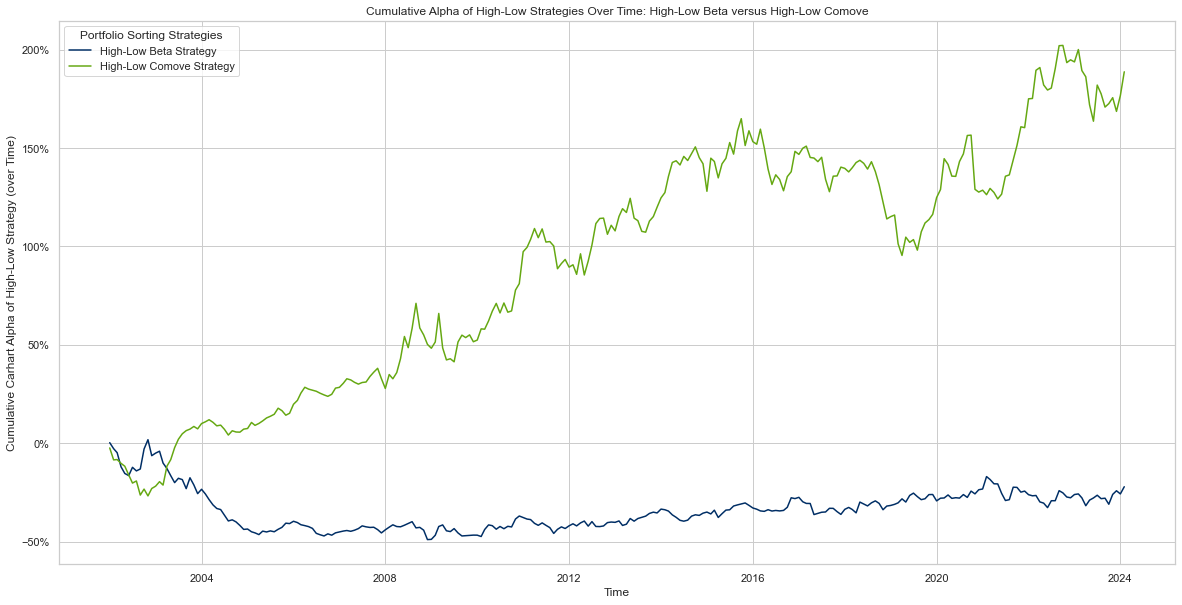

In [22]:
# Convert the MMYYYY to a Proper Date Format first
data.reset_index(inplace=True)
data['MMYYYY'] = pd.to_datetime(data['MMYYYY'], format='%m%Y')
data.set_index('MMYYYY', inplace=True)
data = data.sort_index()

# Set the style
sns.set(style="whitegrid")
colors = {1: '#002E65', 2: '#65A812'}  # Map comove ranks to specific colors
columns = ['Estimated Alpha Beta', 'Estimated Alpha Comove']
labels = ['High-Low Beta Strategy', 'High-Low Comove Strategy']

plt.figure(figsize=(20, 10))
for rank in [1, 2]:
    subset = data[columns[rank-1]]
    cumulative_returns = (1 + subset).cumprod() - 1  # Calculate cumulative returns
    plt.plot(cumulative_returns.index, cumulative_returns, label=labels[rank-1], color=colors[rank])


# Set labels and title
plt.xlabel('Time')
plt.ylabel('Cumulative Carhart Alpha of High-Low Strategy (over Time)')

# Format y-axis as percentage
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

plt.title('Cumulative Alpha of High-Low Strategies Over Time: High-Low Beta versus High-Low Comove')
plt.legend(title="Portfolio Sorting Strategies")

# Save the figure
plt.savefig('CummulativeAlpha_ComoveVsBeta.png')
plt.show()
